In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import result_anova

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/remijul/dataset/master/Airline%20Passenger%20Satisfaction.csv', sep=';')
df

,id,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Satisfaction                       129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [13]:
df.select_dtypes(exclude=[object]).corr().style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'})

,id,Age,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
id,1.000000,0.020322,0.054986,-0.019559,0.001293,0.012607,0.000669,-0.000384,0.054693,0.054023,0.000830,0.055978,0.042325,0.074625,0.082644,0.080834,0.025328,-0.017643,-0.035657
Age,0.020322,1.000000,-0.249625,0.008784,0.039055,0.015749,-0.000547,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011248
Flight_Distance,0.054986,-0.249625,1.000000,-0.042409,0.001350,-0.004649,-0.002409,0.012230,-0.027542,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.110103
Seat_comfort,-0.019559,0.008784,-0.042409,1.000000,0.434951,0.715997,0.405300,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025506
Departure_Arrival_time_convenient,0.001293,0.039055,0.001350,0.434951,1.000000,0.527381,0.544259,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002599
Food_and_drink,0.012607,0.015749,-0.004649,0.715997,0.527381,1.000000,0.523328,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014881
Gate_location,0.000669,-0.000547,-0.002409,0.405300,0.544259,0.523328,1.000000,-0.004086,-0.000280,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003640
Inflight_wifi_service,-0.000384,0.013965,0.012230,0.129131,-0.001974,0.025917,-0.004086,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035270
Inflight_entertainment,0.054693,0.130511,-0.027542,0.426447,0.077203,0.367669,-0.000280,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033321
Online_support,0.054023,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.002908,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.036087


In [5]:
from utils import get_fill_ratio
get_fill_ratio(80, df)

Nombre de colonne(s) remplie a 80% : 24
Arrival Delay in Minutes : 99.7
Online boarding : 100.0
Cleanliness : 100.0
Checkin service : 100.0
Baggage handling : 100.0
Leg room service : 100.0
On-board service : 100.0
Ease of Online booking : 100.0
Online support : 100.0
Inflight entertainment : 100.0
Inflight wifi service : 100.0
id : 100.0
Food and drink : 100.0
Departure/Arrival time convenient : 100.0
Seat comfort : 100.0
Flight Distance : 100.0
Class : 100.0
Type of Travel : 100.0
Age : 100.0
Customer Type : 100.0
Gender : 100.0
Satisfaction : 100.0
Departure Delay in Minutes : 100.0
Gate location : 100.0


Index(['Arrival Delay in Minutes', 'Online boarding', 'Cleanliness',
       'Checkin service', 'Baggage handling', 'Leg room service',
       'On-board service', 'Ease of Online booking', 'Online support',
       'Inflight entertainment', 'Inflight wifi service', 'id',
       'Food and drink', 'Departure/Arrival time convenient', 'Seat comfort',
       'Flight Distance', 'Class', 'Type of Travel', 'Age', 'Customer Type',
       'Gender', 'Satisfaction', 'Departure Delay in Minutes',
       'Gate location'],
      dtype='object')

In [6]:
df.columns = [col.replace(' ', '_') for col in df.columns]
df.columns = [col.replace('/', '_') for col in df.columns]
df.columns = [col.replace('-', '_') for col in df.columns]
df

,id,Satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [7]:
# Anova
dfs = []
for col_cat in df.select_dtypes(include=[object]).columns:
    df_anova = result_anova(col_cat, df, seuil=0.05)
    dfs.append(df_anova)


id
Age
Flight_Distance
Seat_comfort
Departure_Arrival_time_convenient
Food_and_drink
Gate_location
Inflight_wifi_service
Inflight_entertainment
Online_support
Ease_of_Online_booking
On_board_service
Leg_room_service
Baggage_handling
Checkin_service
Cleanliness
Online_boarding
Departure_Delay_in_Minutes
Arrival_Delay_in_Minutes
id
Age
Flight_Distance
Seat_comfort
Departure_Arrival_time_convenient
Food_and_drink
Gate_location
Inflight_wifi_service
Inflight_entertainment
Online_support
Ease_of_Online_booking
On_board_service
Leg_room_service
Baggage_handling
Checkin_service
Cleanliness
Online_boarding
Departure_Delay_in_Minutes
Arrival_Delay_in_Minutes
id
Age
Flight_Distance
Seat_comfort
Departure_Arrival_time_convenient
Food_and_drink
Gate_location
Inflight_wifi_service
Inflight_entertainment
Online_support
Ease_of_Online_booking
On_board_service
Leg_room_service
Baggage_handling
Checkin_service
Cleanliness
Online_boarding
Departure_Delay_in_Minutes
Arrival_Delay_in_Minutes
id
Age
Flight

In [8]:
print(f'length : {len(dfs)} dataframes')
dfs[0]

length : 5 dataframes


,Satisfaction,Colonne(s) numérique(s),Résultat Anova,P-value
0,Satisfaction,id,Il y a un lien,1.233296e-06
1,Satisfaction,Age,Il y a un lien,0.000000e+00
2,Satisfaction,Flight_Distance,Il y a un lien,4.569126e-45
3,Satisfaction,Seat_comfort,Il y a un lien,0.000000e+00
4,Satisfaction,Departure_Arrival_time_convenient,Il y a un lien,1.884204e-08
5,Satisfaction,Food_and_drink,Il y a un lien,0.000000e+00
6,Satisfaction,Gate_location,Il y a un lien,1.004567e-05
7,Satisfaction,Inflight_wifi_service,Il y a un lien,0.000000e+00
8,Satisfaction,Inflight_entertainment,Il y a un lien,0.000000e+00
9,Satisfaction,Online_support,Il y a un lien,0.000000e+00


In [9]:
from utils import chi2
for col_cat in df.select_dtypes(include=[object]).drop('Satisfaction', axis=1).columns:
    print(col_cat)
    chi2(df, 'Satisfaction', col_cat)

Gender
Il y a un lien entre les colonnes Satisfaction et Gender
La p-value vaut 0.0

Customer_Type
Il y a un lien entre les colonnes Satisfaction et Customer_Type
La p-value vaut 0.0

Type_of_Travel
Il y a un lien entre les colonnes Satisfaction et Type_of_Travel
La p-value vaut 0.0

Class
Il y a un lien entre les colonnes Satisfaction et Class
La p-value vaut 0.0



In [10]:
[print(f"{col} : {df[col].unique()}") for col in df.select_dtypes(include=[object]).columns]

Satisfaction : ['satisfied' 'neutral or dissatisfied']
Gender : ['Female' 'Male']
Customer_Type : ['Loyal Customer' 'disloyal Customer']
Type_of_Travel : ['Personal Travel' 'Business travel']
Class : ['Eco' 'Business' 'Eco Plus']


[None, None, None, None, None]

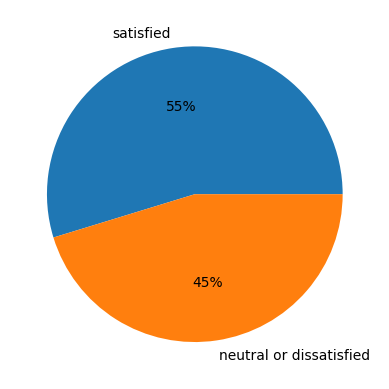

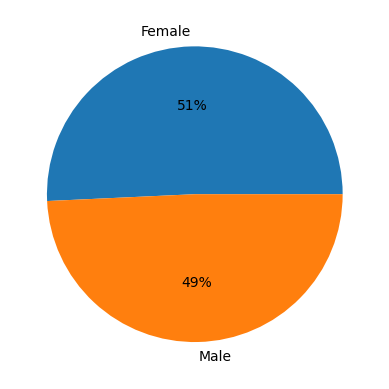

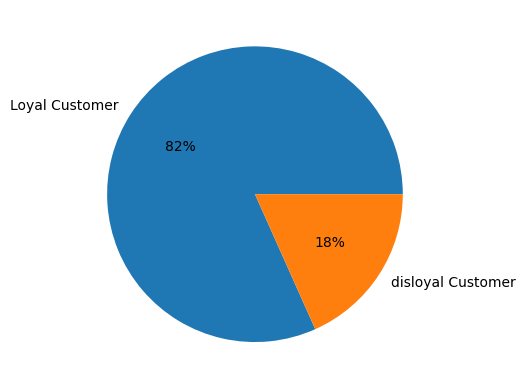

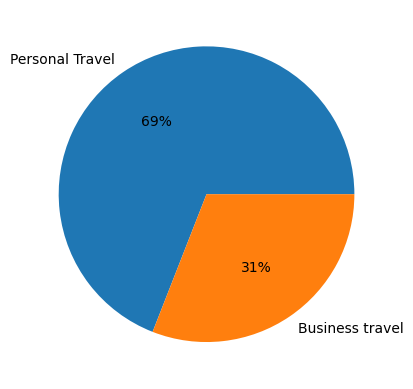

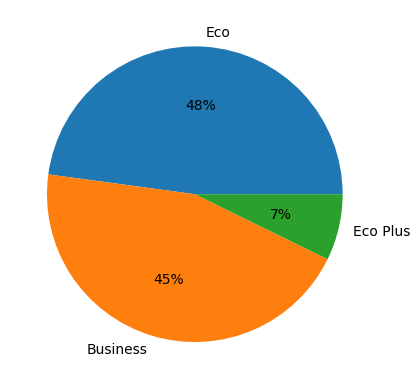

In [14]:
for col_cat in df.select_dtypes(include=[object]):
    plt.pie(df[col_cat].value_counts(), labels=df[col_cat].unique(), autopct='%.0f%%')
    plt.show()

In [29]:
df.select_dtypes(exclude=[object]).columns

Index(['id', 'Age', 'Flight_Distance', 'Seat_comfort',
       'Departure_Arrival_time_convenient', 'Food_and_drink', 'Gate_location',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Online_booking', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes'],
      dtype='object')

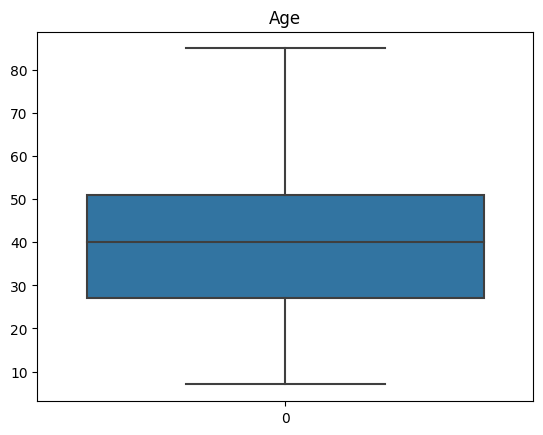

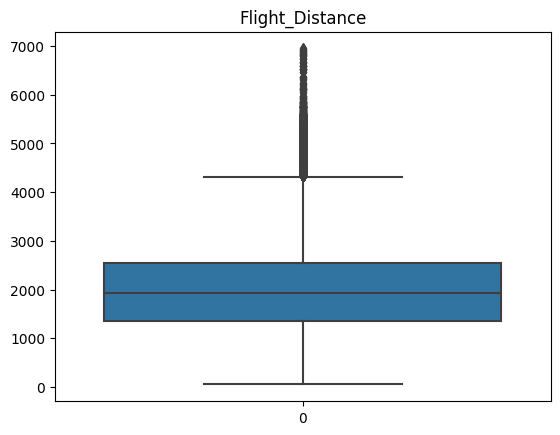

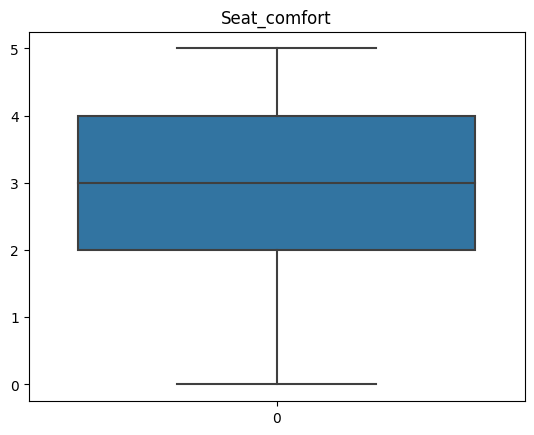

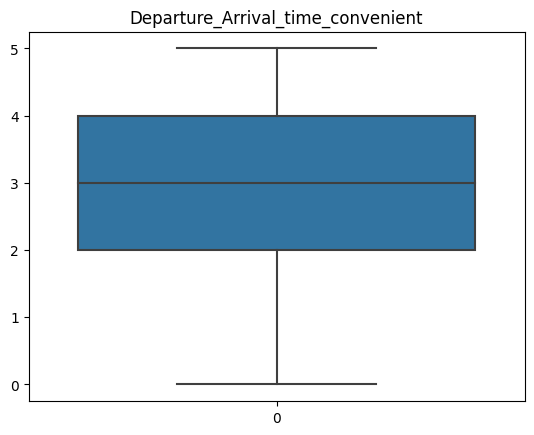

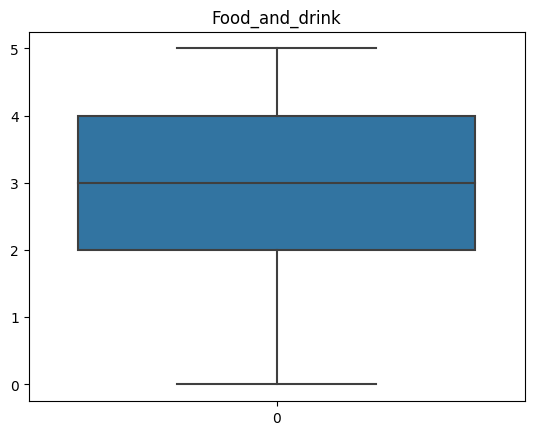

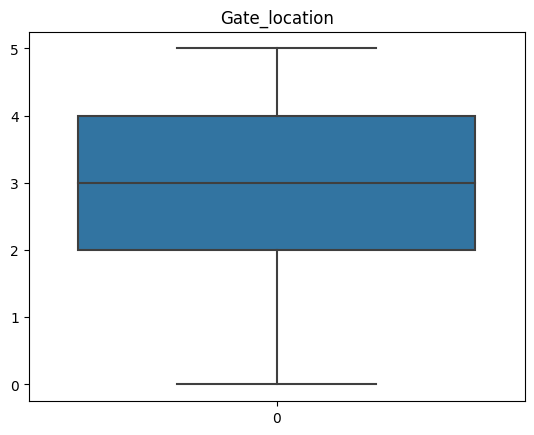

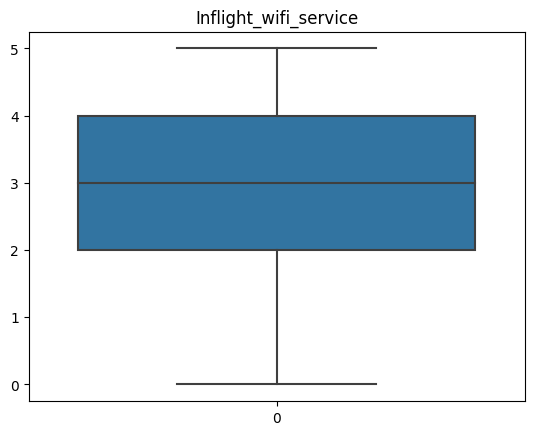

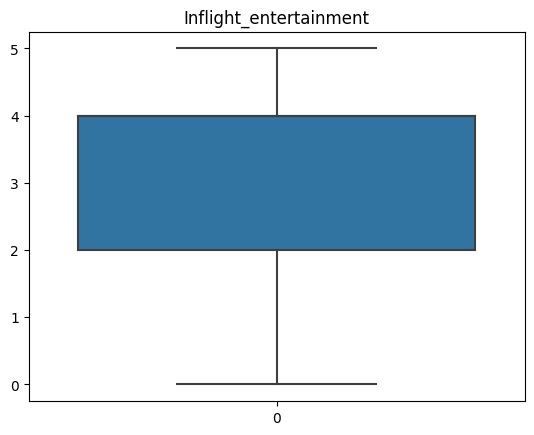

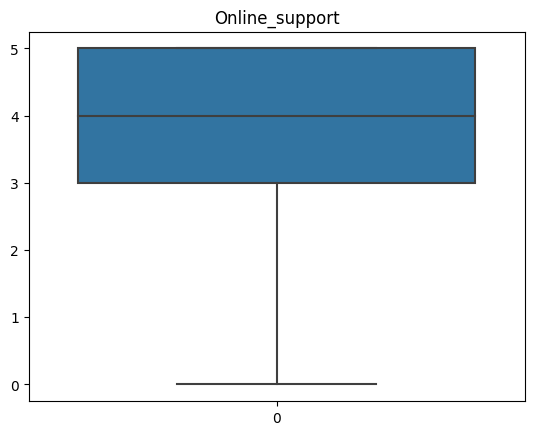

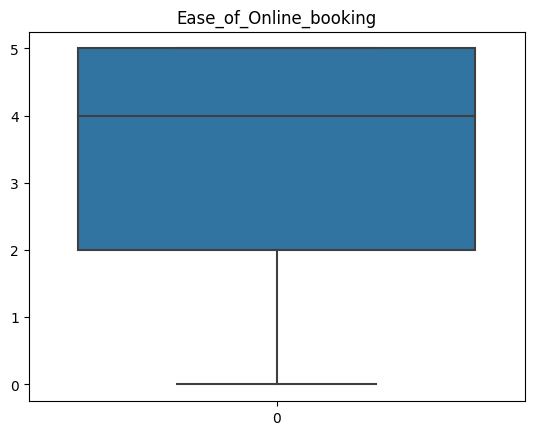

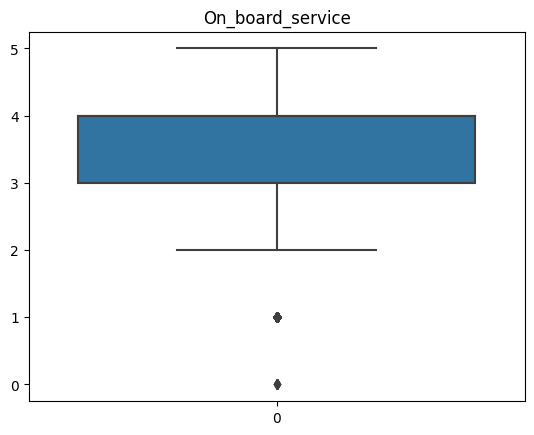

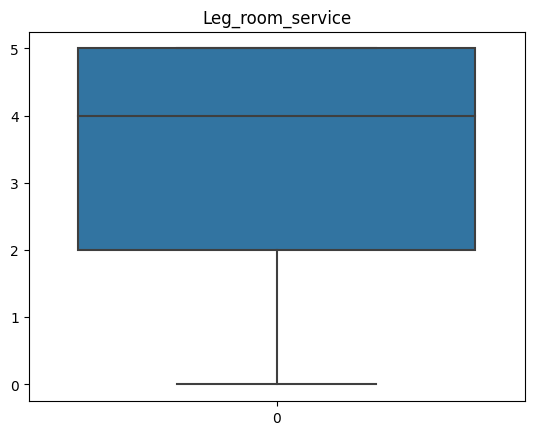

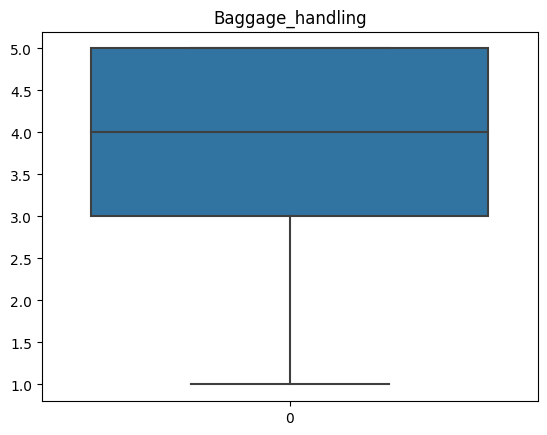

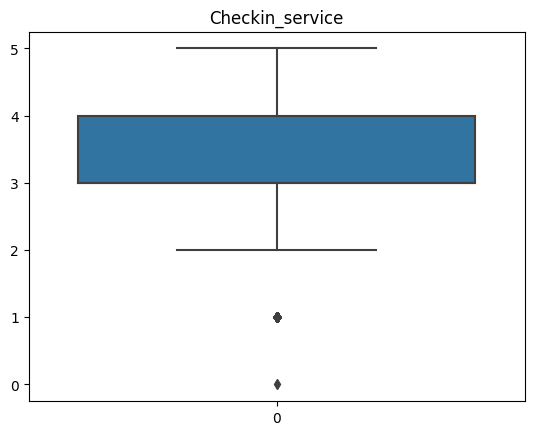

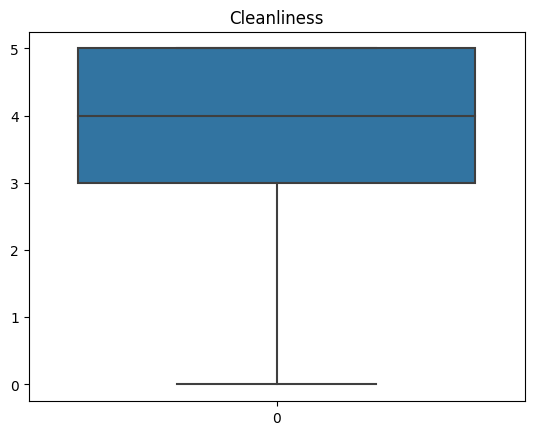

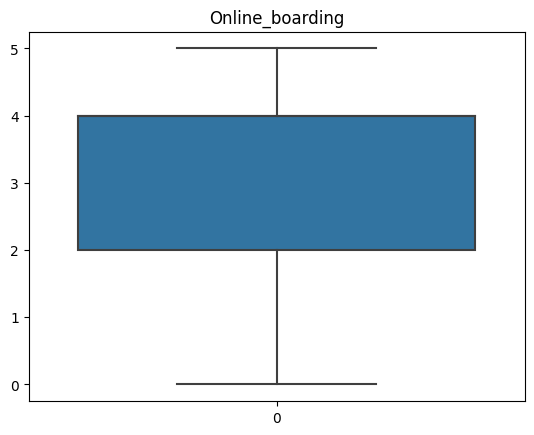

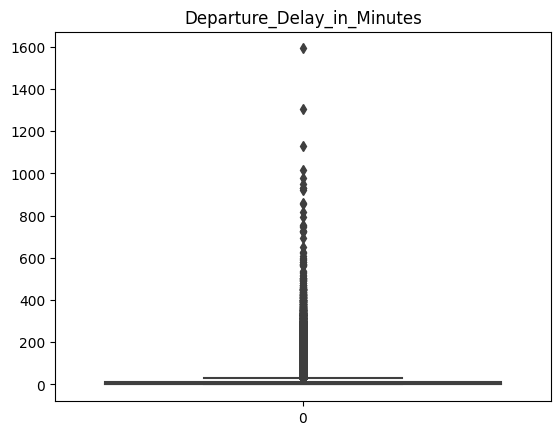

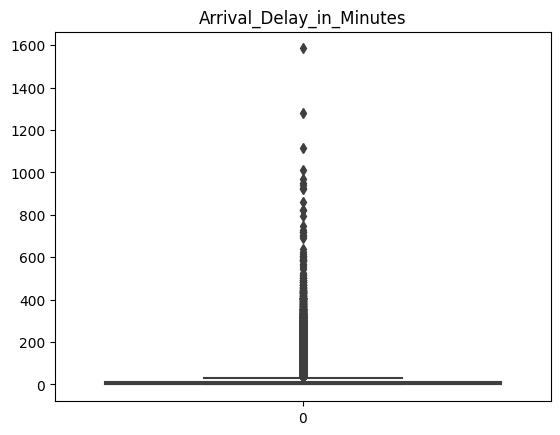

In [37]:
for col_num in df.select_dtypes(exclude=[object]).drop('id', axis=1).columns:
    plt.figure()
    sns.boxplot(df[col_num]).set(title=col_num)